In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid", context="talk")

In [162]:
def get_dfs(rewards_list):
    dfs = []
    alpha = 0.10 
    win = 100

    for rewards in rewards_list:
        episodes = np.arange(len(rewards))
        df = pd.DataFrame({
            "episode": episodes,
            "reward" : rewards,
        })

        df["roll_mean"] = (
            df["reward"]
            .rolling(window=win, min_periods=1)
            .mean()
        )
        df["roll_sem"]  = df["reward"].rolling(win).sem()
        df["ema"] = df["reward"].ewm(alpha=alpha).mean()

        dfs.append(df)
    
    return dfs

def draw_rewards(rewards, n):
    df = get_dfs([rewards])[0]

    plt.figure(figsize=(12, 5))

    sns.lineplot(data=df, x="episode", y="reward", color="steelblue", alpha=.2)
    sns.lineplot(data=df, x="episode", y="ema", color="tomato", linewidth=2)

    plt.fill_between(
        df["episode"],
        df["roll_mean"] - 1.96*df["roll_sem"],
        df["roll_mean"] + 1.96*df["roll_sem"],
        alpha=.2
    )
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title(f"Training Reward (Smoothed) - {n} agents")
    plt.legend(frameon=False, loc=2)
    plt.tight_layout()
    plt.show()

def draw_rewards_multi(rewards, labels):
    fig, axs = plt.subplots(nrows=len(rewards), ncols=1, figsize=(12, 4 * len(rewards) + 1), sharey=True, sharex=True)

    dfs = get_dfs(rewards)

    for i, r, label in zip(range(len(rewards)), dfs, labels):
        l1 = "Raw"
        l2 = "EMA, $\\alpha=0.1$"

        if i != len(rewards) - 1:
            l1, l2 = None, None

        sns.lineplot(data=r, x="episode", y="reward", color="steelblue", alpha=.2, ax=axs[i], label=l1)
        sns.lineplot(data=r, x="episode", y="ema", color="tomato", linewidth=2, ax=axs[i], label=l2)

        plt.fill_between(
            r["episode"],
            r["roll_mean"] - 1.96 * r["roll_sem"],
            r["roll_mean"] + 1.96 * r["roll_sem"],
            alpha=.2
        )
        
        axs[i].set_title(label)
        axs[i].set(ylabel="Total Reward")

    plt.xlabel("Episode")
    plt.xlim(0, 100)
    plt.legend(frameon=False)
    axs[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, ncol=2)
    plt.tight_layout()
    plt.show()

def draw_comparison(rewards, labels, palette = sns.color_palette("Paired"), skip = 1):
    plt.figure(figsize=(12, 6))
    dfs = get_dfs(rewards)

    for i, r, label in zip(range(len(dfs)), dfs, labels):
        sns.lineplot(data=r, x="episode", y="ema", label=label, c=palette[(skip * i) % len(palette)])
    
    plt.xlabel("Episode")
    plt.xlim(0, 100)
    plt.ylabel("Total reward")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, ncol=min(4, len(rewards)), fontsize=14)
    plt.tight_layout()
    plt.show()

In [122]:
# our implementation of matd3
rewards_2 = np.load("../models/eval_reward_2.npy")
rewards_3 = np.load("../models/eval_reward_3.npy")
rewards_4 = np.load("../models/eval_reward_4.npy")
rewards_8 = np.load("../models/eval_reward_8.npy")
rewards_16 = np.load("../models/eval_reward_16.npy")

# stablebaselines 3
td3_rewards_2 = np.load("../models/eval_reward_2_td3.npz")["results"][25:].flatten()
td3_rewards_4 = np.load("../models/eval_reward_4_td3.npz")["results"][25:].flatten()

## Comparing TD3 vs MATD3

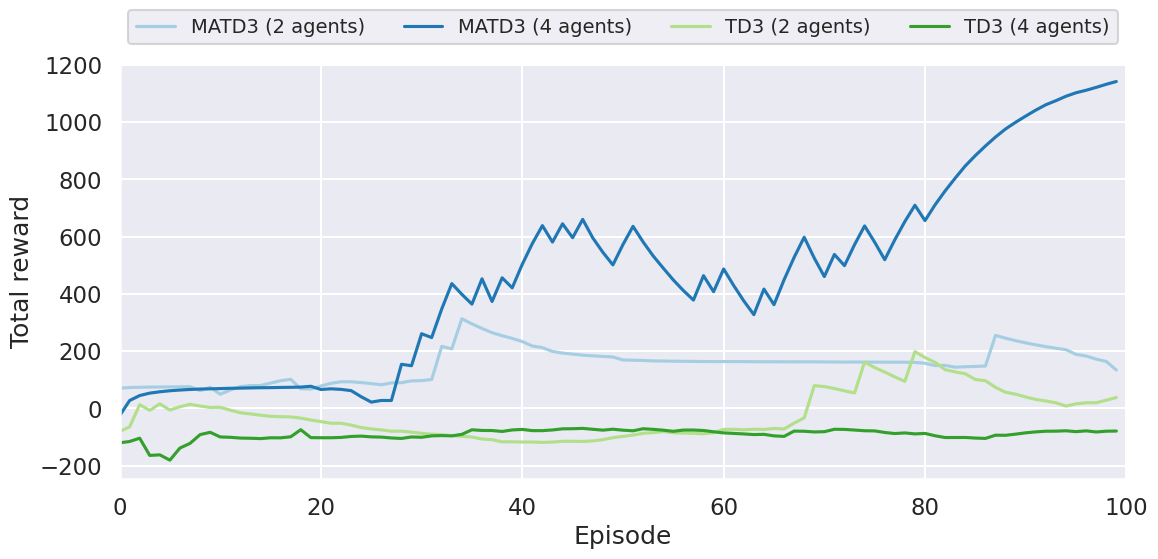

In [163]:
rewards = [
    rewards_2,
    rewards_4,
    td3_rewards_2,
    td3_rewards_4,
]

labels = [
    "MATD3 (2 agents)",
    "MATD3 (4 agents)",
    "TD3 (2 agents)",
    "TD3 (4 agents)",
]

draw_comparison(rewards, labels, palette=sns.color_palette("Paired", 4), skip=1)

## Comparing number of agents for MATD3

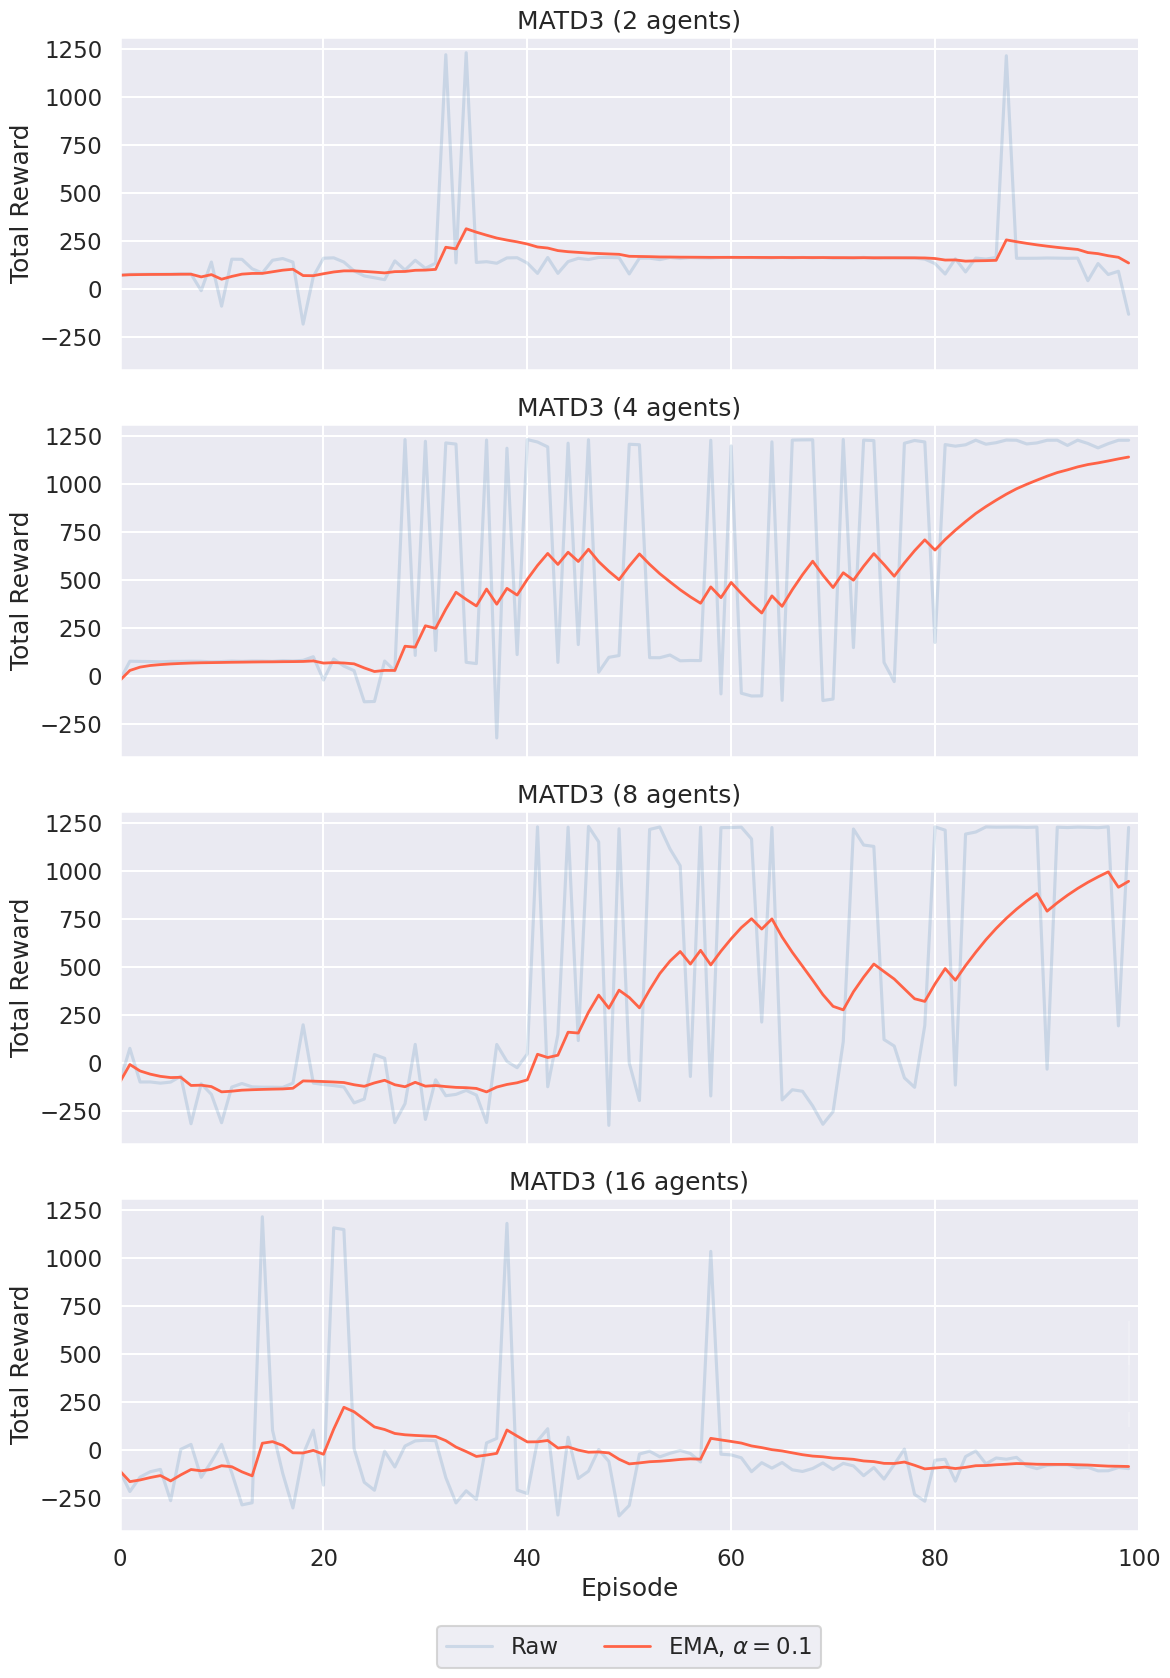

In [ ]:
rewards = [
    rewards_2,
    rewards_4,
    rewards_8,
    rewards_16,
]

labels = [
    "MATD3 (2 agents)",
    "MATD3 (4 agents)",
    "MATD3 (8 agents)",
    "MATD3 (16 agents)",
]

draw_rewards_multi(rewards, labels)